In [2]:
import time
import numpy as np
import math as math
import matplotlib.pyplot as plt

### Example of pair potential for system with Van der Waals type interaction
### Lennard-Jones Potential

$$ U(r_{ij}) = 4 \times \epsilon \Big[(\frac{\sigma}{r_{ij}})^{12} - (\frac{\sigma}{r_{ij}})^{6}\Big]$$

In [3]:
# Lennard-Jones Potential (Ex. Inert gas - Van der Walls type interaction)
# Defining a python function for the potential and force

def LJ_pot(eps, sig, x):
    pot = 4*eps*((sig/x)**12 - (sig/x)**6)
    return pot

def LJ_force(eps, sig, x):
    force = 4*eps*(12*(sig**12/x**13) - 6*(sig**6/x**7))
    return force

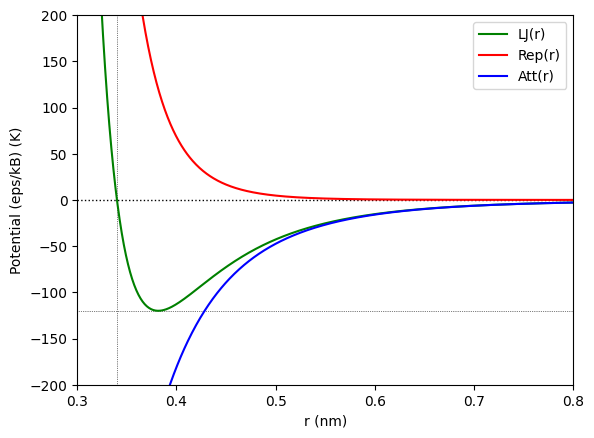

In [4]:
#plot (LJ potential)

# Boltzmann's constant
# kB = 1.38e-23 J/K

#LJ parameters (Argon)
eps = 119.98 # eps/kB
sig = 0.34 # nm

x = np.linspace(0.3, 1,1000)
y = LJ_pot(eps, sig, x)
y_rep = 4*eps*((sig/x)**12)
y_att = -4*eps*((sig/x)**6)

plt.xlim(0.3, 0.8)
plt.ylim(-200, 200)

plt.xlabel('r (nm)')
plt.ylabel('Potential (eps/kB) (K)')

plt.hlines(y=0.0, xmin=x.min(), xmax=x.max(), lw=1, ls=':', color='k')
plt.vlines(x=sig, ymin=-200, ymax=200, lw=0.5, ls=':', color='k')
plt.hlines(y=-eps, xmin=x.min(), xmax=x.max(), lw=0.5, ls=':', color='k')

plt.plot(x,y, ls='-', color='g', label=r'LJ(r)')
plt.plot(x,y_rep, ls='-', color='r', label=r'Rep(r)')
plt.plot(x,y_att, ls='-', color='b', label=r'Att(r)')

plt.legend()
plt.show()

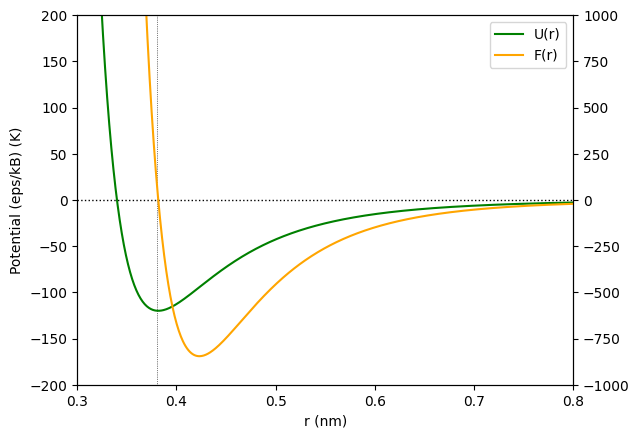

In [5]:
#plot (LJ potential and force between the pairs)

# Boltzmann's constant
# k = 1.38e-23 J/K

#LJ parameters (Argon)
eps = 119.98 # eps/kB
sig = 0.34 # nm

x = np.linspace(0.3, 1,1000)
y = LJ_pot(eps, sig, x)
force = LJ_force(eps, sig, x)

plt.xlim(0.3, 0.8)
plt.ylim(-200, 200)

plt.xlabel('r (nm)')
plt.ylabel('Potential (eps/kB) (K)')

plt.hlines(y=0.0, xmin=x.min(), xmax=x.max(), lw=1, ls=':', color='k')

#potential minima (equlibrium separation) at x=0.38, also force is zero
plt.vlines(x=0.38, ymin=-200, ymax=200, lw=0.5, ls=':', color='k')
line1 = plt.plot(x,y, ls='-', color='g', label=r'U(r)')

plt.twinx()
plt.xlim(0.3, 0.8)
plt.ylim(-1000, 1000)
line2 = plt.plot(x,force, ls='-', color='orange', label=r'F(r)' )


lines = line1 + line2
labels = []
for line in lines:
    labels.append(line.get_label())
plt.legend(lines, labels)

plt.show()

#### Can we model the trajectory x(t) of Argon atoms - in a similar way as we did SHO using the Verlet algorithm: 

$$x(t+dt) = 2*x(t) - x(t-dt) + F/m*dt^{2}$$

Note: Interaction between Argon atoms is defined using Lennard-Jones Potential

In [10]:
## Units

## Constant
kB = 8.617*10**(-5)  # in eV/K

## LJ-parametes for Argon (Reference:http://www.sklogwiki.org/SklogWiki/index.php/Argon)
sig = 3.405 # in angstrom
eps = 119.8 # is eps/kB and units in (Kelvin)
epsinkB = 119.8*kB # is eps/kB and units in (Kelvin)

mass_ar = 39.948 ## gm/mole 

##Units conversions
eV2J = 1.602*10**(-19)
eV2kg = 1.782*10**(-36)

mass_ar = (39.948*10**(-3)) # in kg


In [11]:
## Assume a seperation rij between Argon atoms as 4Å
x = 4.0

In [12]:
force = LJ_force(epsinkB, sig, x)

In [9]:
force

-0.005633038731436643

##### What about the units of the force?

* $x =3.405$ is in Å 

* $\epsilon = 119.8$ is normalized by boltzman constant $k_{\mathrm{B}}$ and is in units of K.

* Alrernatively, if we multiply it by kB, then $\epsilon = 119.8 k_{\mathrm{B}}$ is in units of eV

* From, LJ-potential ($U_{ij}$), force can be calculated as:
$$F_{i} = \nabla U_{ij}$$

$$ F(r_{ij}) = 4 \times \epsilon \Big[\frac{12}{r_{ij}}\big({\frac{\sigma}{r_{ij}}\big)^{12}} - \frac{6}{r_{ij}}\big({\frac{\sigma}{r_{ij}}\big)^{6}}\Big]$$

* Force units = eV/Å

For writing greek symbols as Latex in the jupyter notebook check:
https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols

In [13]:
## Calculate the acceleration
acc = force/mass_ar
acc

-0.14100928035037155

##### Units of the acceleration?

* acceleration will be in units eV/Å-Kg
* conversion 
$$\frac{1\mathrm{eV}}{\mathrm{Å \cdot Kg}} = \frac{1.602 \times 10^{-19}}{10^{-10}}\frac{\mathrm{Kg\cdot m^{2}}}{\mathrm{m \cdot Kg \cdot s^{2}}} = 1.602 \times 10^{-9}\frac{\mathrm{m}}{\mathrm{s^{2}}} = 1.602 \times 10^{5}\frac{\mathrm{Å}}{\mathrm{pico sec^{2}}}$$

In [14]:
## Acceleration in Ångstrom/pico-sec^2
acc = acc*1.602*10**(5)
acc

-22589.686712129525

##### Initialize velcoty using the relation

* $\frac{1}{2} \mathrm{mass}v^{2} = \frac{3}{2}\mathrm{k_{B}}T$ in a one-dimensional system

* $v = \sqrt{\frac{\mathrm{3k_{B}T}}{\mathrm{mass}}}$

In [15]:
#### Initialize velocity using the temperature
### Note this is just the initial velocity 

T = 1 #Kelvin
vel = np.sqrt(3*kB*eV2J*T/mass_ar)
vel

np.float64(3.2197519070645734e-11)

##### Units of the velocity?

* $v = \sqrt{\frac{\mathrm{k_{B}T}}{\mathrm{mass}}} = \sqrt{\frac{\mathrm{Kg\cdot m^{2}T}}{\mathrm{Kg \cdot s^{2}T}}} = \frac{m}{s}$

In [16]:
## Velocity in Ångstrom/pico-sec
vel = vel*10**(2)
vel

np.float64(3.219751907064573e-09)

In [17]:
## Putting together in a Verlet algorithm

In [18]:
## Initial conditions
dt = 10**(-3) ## in pico-sec
n = 200 ## number of time steps
T = 298 ## Kelvin
vel = np.sqrt(3*kB*eV2J*T/mass_ar)
vel = vel*10**(2)   # in Å/ps

x0 = 4.0   ## Starting guess value for inter-atomic distance, in Angstrom
x1 = x0 + vel*dt

In [19]:
t = np.zeros((n,), dtype=float)
r = np.zeros((n,), dtype=float)

In [20]:
for i in range(n):
    t[i] = i*dt

In [21]:
print(f'x0 =',x0)
print(f'x1 =',x1)

x0 = 4.0
x1 = 4.000000000055581


In [22]:
r[0] = x0
r[1] = x1

#update Verlet
for i in range(2,n):
    force = 1*LJ_force(epsinkB, sig, r[i-1]) ## in eV/Å
    acc = (force/mass_ar)*1.602*10**(5) ## in Å/ps^2
    r[i] = 2*r[i-1] - r[i-2] + (acc)*dt**2   ## in Å, time in ps

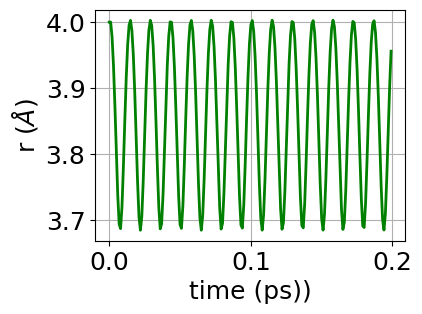

In [26]:
plt.rc("font", size=18)
fig, ax = plt.subplots(figsize=(4,3))


#plot
ax.plot(t,r, 'green', linewidth=2)

# ax.set_xlim(0.35,0.55)
# ax.set_ylim(-0.1, 0.1)

# ax.hlines(x=x0, lw=0.5, ls=':', color='k')

ax.set_ylabel(r'r ($\AA$)')
ax.set_xlabel('time (ps))')

ax.grid(True)

plt.show()

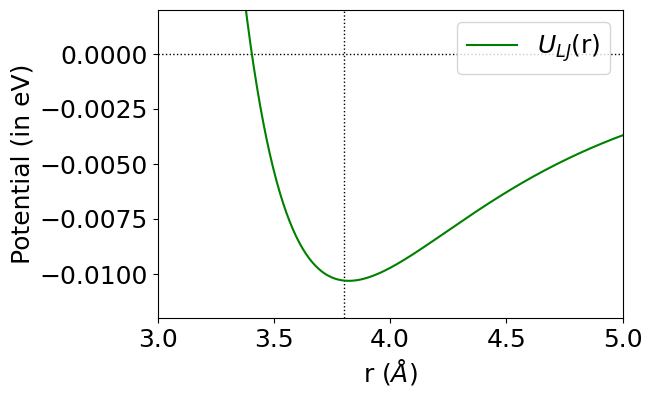

In [27]:
# plot (LJ potential and force between the Ar atoms)

plt.rc("font", size=18)
fig, ax = plt.subplots(figsize=(6,4))

# Boltzmann's constant
# k = 1.381e-12 J/K

#LJ parameters (Argon)
epsinkB = 119.8*kB # is eps/kB and units in (Kelvin)
sig = 3.405 # Å

x = np.linspace(3, 10,1000)
U = LJ_pot(epsinkB, sig, x)

ymin = -0.012
ymax = 0.002

ax.set_xlim(3, 5)
ax.set_ylim(ymin, ymax)

ax.set_xlabel(r'r ($\AA$)')
ax.set_ylabel('Potential (in eV)')

ax.hlines(y=0.0, xmin=x.min(), xmax=x.max(), lw=1, ls=':', color='k')

#potential minima (equlibrium separation) at x=3.8, force is zero
ax.vlines(x=3.8, ymin=ymin, ymax=ymax, lw=1, ls=':', color='k')

line1 = ax.plot(x,U, ls='-', color='g', label=r'$U_{LJ}$(r)')

ax.legend()
# ax.grid()

plt.show()

###### Homework
1. Does the trajectory of Ar-atoms make sense?
2. See above for the Potential energy as a function of separation distance. For starting guess values close to 3.8Å, motion is like of an oscillator.
3. However, it is an anharmonic-oscalliation. What is an anharmonic motion?
4. Play with intial separation distance and see how the motion changes. 
5. Whats happens to the motion if you choose the starting separation too less (r < 3.4Å) or too large (r > 8.0Å)? Does the results make sense?